In [1]:
import matplotlib.pyplot as plt
import pandas
import re
from pathlib import Path
import numpy as np
import random

In [2]:
# Parse the folders
folder_path = Path('C:/Users/farla/Documents/Summer2023/XCData/CrossCultureResearch')

# Create a dictionary to store the CP paths
csv_categorized = {}

# Iterate over all csv files
for file in folder_path.rglob('*.csv'):  # "r"glob for recursive
    # Check filename pattern
    filename = file.name
    # (\d+) tries to match and catch any number of digits
    # use https://regex101.com to check and modify regex if file name pattern changes in the future
    match = re.match(r'CSVScenario-CP(\d+)_Session-.+_\d{4}-\d{2}-\d{2}-\d{2}-\d{2}-\d{2}\.csv', filename)
    if match:
        # Use the capture to get get CP number
        crosspath_number = match.group(1)
       
        if crosspath_number not in csv_categorized:
            csv_categorized[crosspath_number] = [file]
        else:
            csv_categorized[crosspath_number].append(file)

# Print categorized csv files
for crosspath_number, files in csv_categorized.items():
    print(f'CP{crosspath_number} - {len(files)} ')
    #for file in files:
        #print(f'  File: {file}')

CP1 - 314 
CP2 - 302 
CP3 - 309 
CP5 - 305 
CP6 - 281 
CP7 - 301 
CP8 - 282 
CP4 - 3 


In [3]:
validity_path = Path('C:/Users/farla/Documents/Summer2023/Python/DataValidity/')
validity_csv_name = "path_validity_CP1.csv"

valid_paths = []
invalid_paths = []

def PrintAllValidCSV(isValid):
    validity_df = pandas.read_csv(validity_path / validity_csv_name, sep = ";")   
    
    # Filter out only valid files
    valid_files_df = validity_df[validity_df['Validity'] == isValid]

    # Print the valid files
    i = 0
    temp_path = []
    for index, row in valid_files_df.iterrows():
        #print(row['Path'])
        i += 1
        temp_path.append(row['Path'])
    print(i)
    return temp_path
    
valid_paths = PrintAllValidCSV(True)
invalid_paths = PrintAllValidCSV(False)

182
132


In [4]:
def DrawIntersections(paths):
    num_rows = len(paths) // 8
    if len(paths) % 8:
        num_rows += 1
    fig, axs = plt.subplots(num_rows, 8, figsize=(20, num_rows*2.5))

    zoomFactor = 50
    wantedDistanceWithin = 35

    for i, path in enumerate(paths):
        try:
            df = pandas.read_csv(path, sep=';')
            dfA = df[((df['HeadPosXA'] > -wantedDistanceWithin) & (df['HeadPosXA'] < wantedDistanceWithin)) & ((df['HeadPosZA'] > -wantedDistanceWithin) & (df['HeadPosZA'] < wantedDistanceWithin))]
            dfB = df[((df['HeadPosXB'] > -wantedDistanceWithin) & (df['HeadPosXB'] < wantedDistanceWithin)) & ((df['HeadPosZB'] > -wantedDistanceWithin) & (df['HeadPosZB'] < wantedDistanceWithin))]

            row = i // 8
            col = i % 8

            axs[row, col].plot(dfA['HeadPosXA'], dfA['HeadPosZA'],color='red')
            axs[row, col].plot(dfB['HeadPosXB'], dfB['HeadPosZB'],color='blue')

            axs[row, col].plot([-wantedDistanceWithin,-wantedDistanceWithin],[-wantedDistanceWithin,wantedDistanceWithin], color='black')
            axs[row, col].plot([-wantedDistanceWithin,wantedDistanceWithin],[wantedDistanceWithin,wantedDistanceWithin], color='black')
            axs[row, col].plot([wantedDistanceWithin,wantedDistanceWithin],[wantedDistanceWithin,-wantedDistanceWithin], color='black')
            axs[row, col].plot([wantedDistanceWithin,-wantedDistanceWithin],[-wantedDistanceWithin,-wantedDistanceWithin], color='black')

            axs[row, col].set_xlim([-zoomFactor, zoomFactor])
            axs[row, col].set_ylim([-zoomFactor, zoomFactor])

            # Set title as last 8 characters of the path
            axs[row, col].set_title(path[-12:-4])
        except:
            continue

    # Remove empty plots that didn't fill the grid
    if len(paths) % 8:
        for j in range(len(paths) % 8, 8):
            fig.delaxes(axs[num_rows - 1, j])

    plt.tight_layout()
    plt.show()

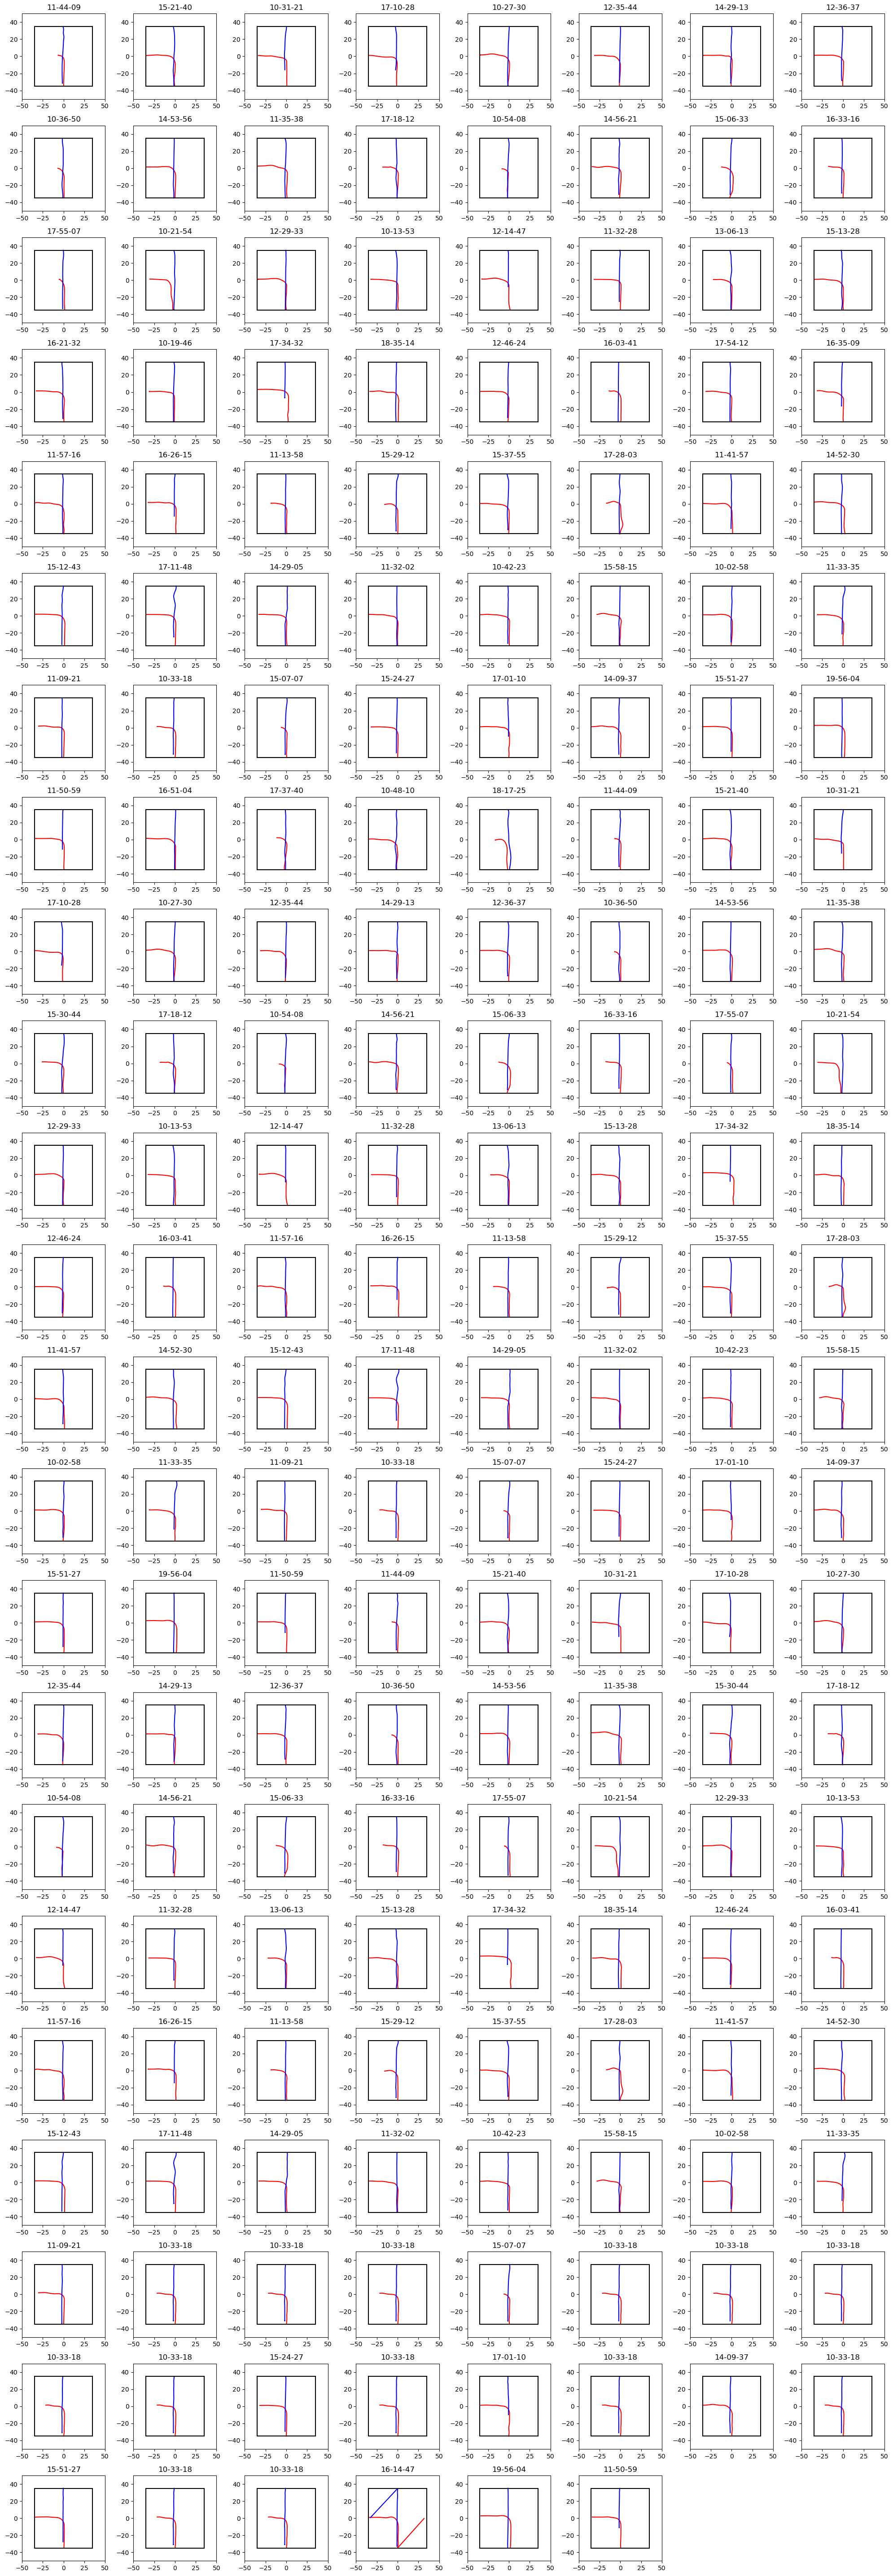

In [5]:
DrawIntersections(valid_paths)

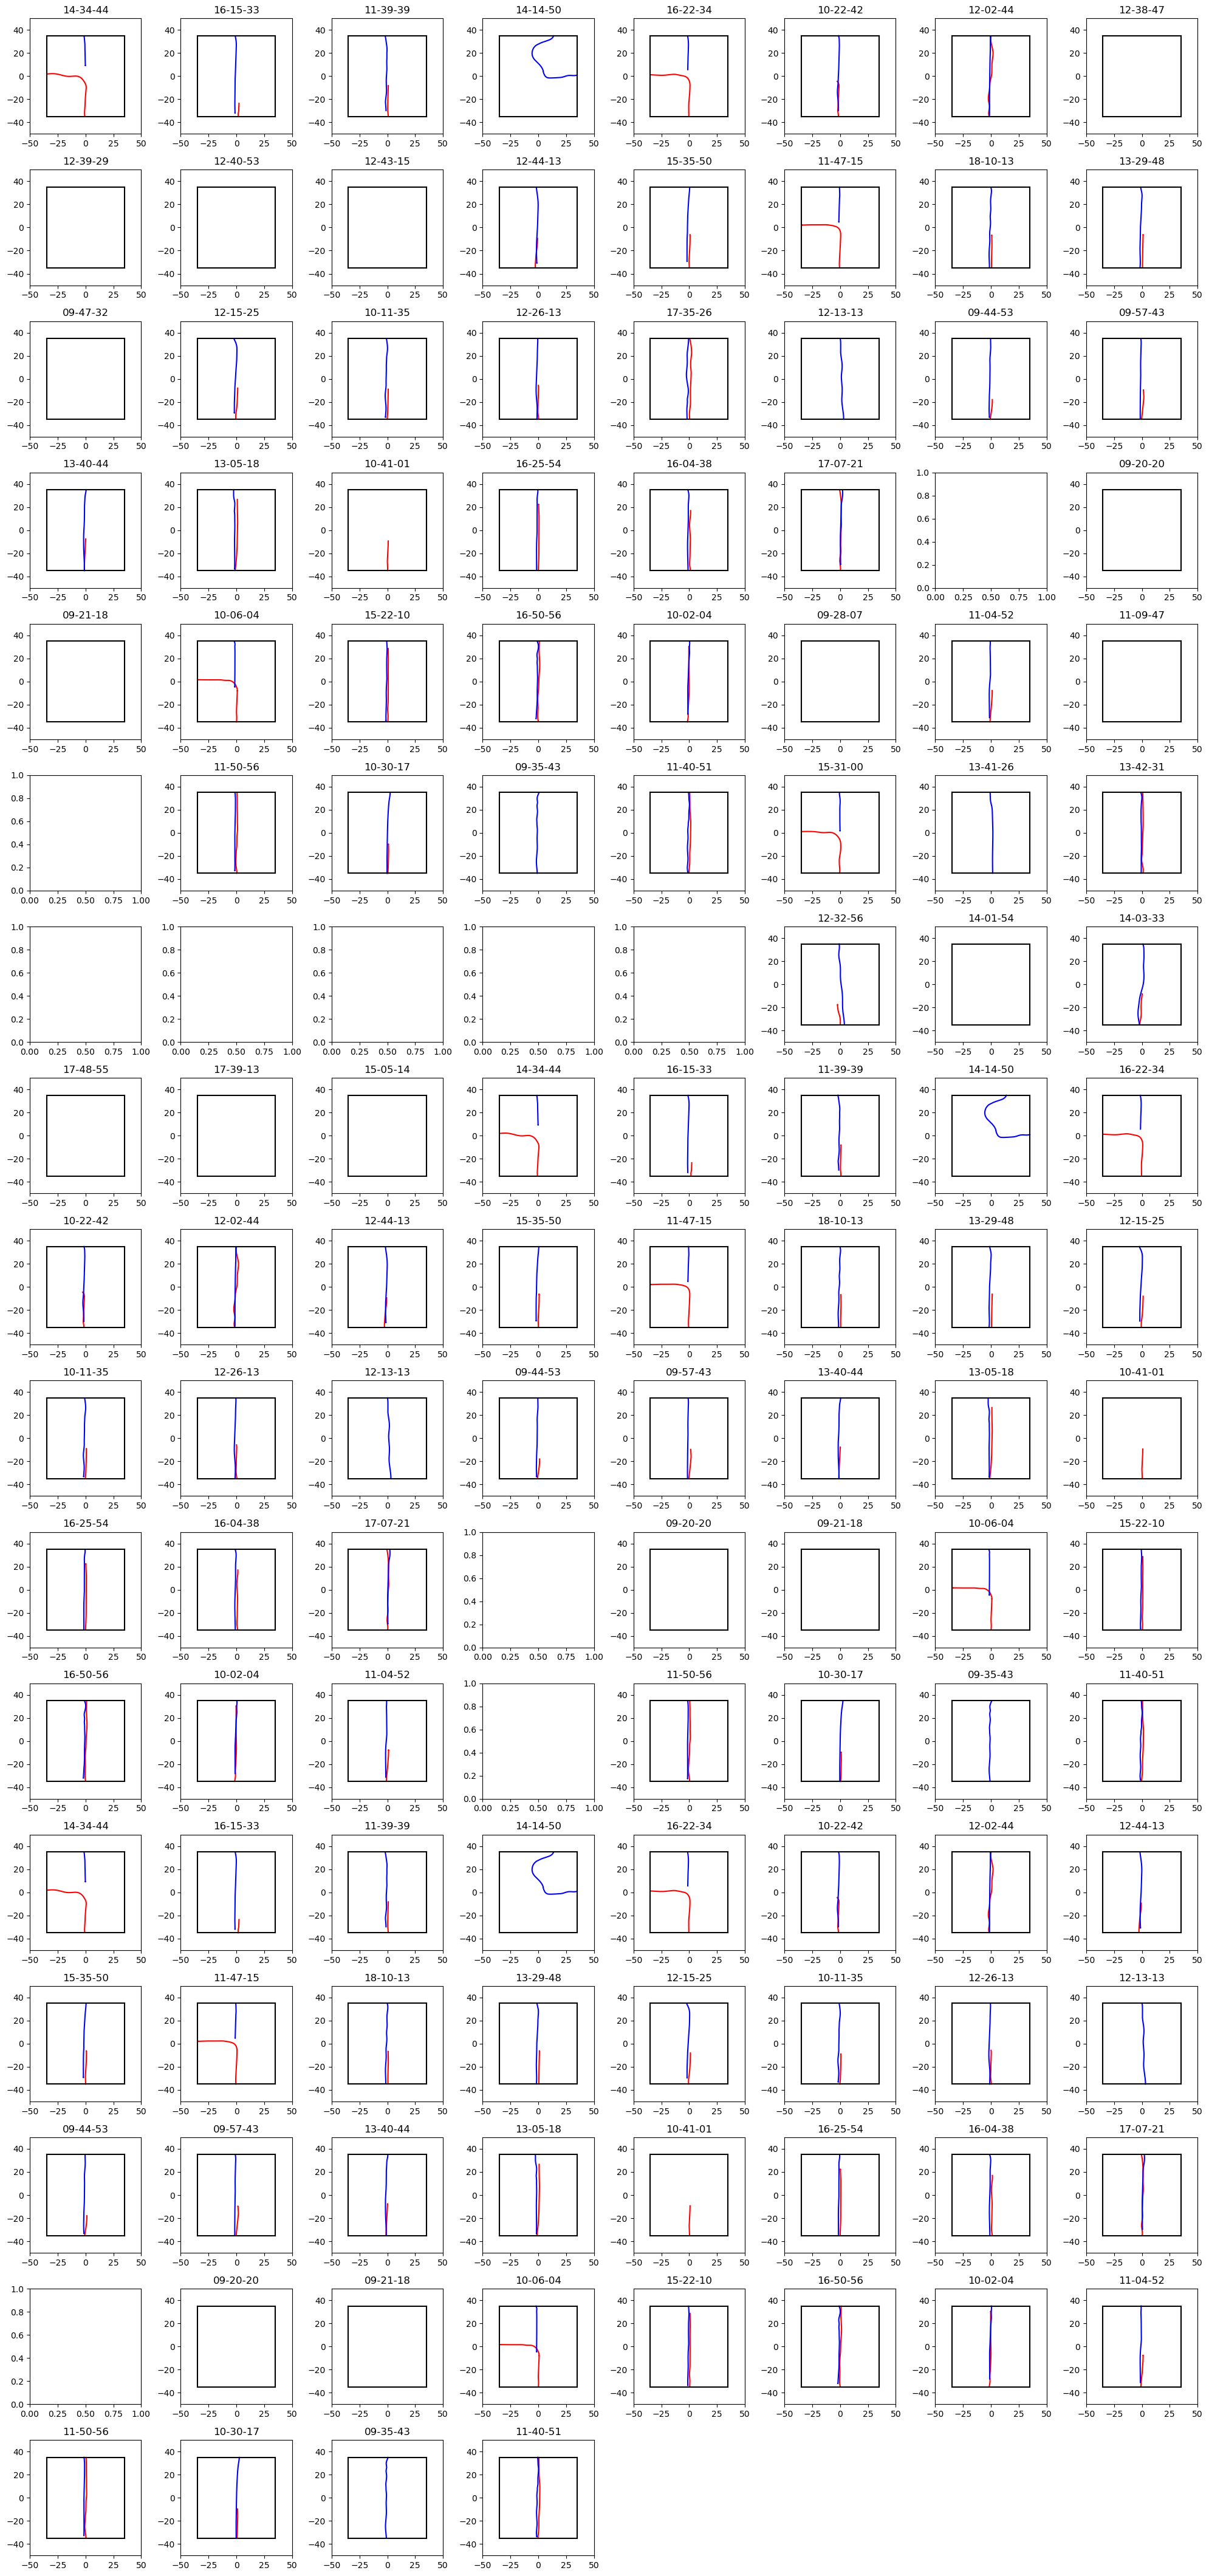

In [6]:
DrawIntersections(invalid_paths)